In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
 # Load dataset
# part A:Descriptive Analytics – “What Happened?”
data = pd.read_csv("sales_data_visualization.csv")
data

,Date,Region,Category,Sales,Advertising_Spend,Profit
0,2024-01-01,East,Furniture,18083,1659,3331.46
1,2024-01-02,West,Clothing,18339,3811,1967.68
2,2024-01-03,North,Clothing,18931,2369,5558.93
3,2024-01-04,East,Clothing,8627,2986,1321.08
4,2024-01-05,East,Clothing,14555,6630,5562.01
...,...,...,...,...,...,...
95,2024-04-05,South,Electronics,14339,1959,4693.93
96,2024-04-06,South,Clothing,9282,6600,968.28
97,2024-04-07,West,Electronics,16589,5548,2236.56
98,2024-04-08,South,Electronics,7511,4067,854.76


In [4]:
# Show first 5 rows
data.head()

,Date,Region,Category,Sales,Advertising_Spend,Profit
0,2024-01-01,East,Furniture,18083,1659,3331.46
1,2024-01-02,West,Clothing,18339,3811,1967.68
2,2024-01-03,North,Clothing,18931,2369,5558.93
3,2024-01-04,East,Clothing,8627,2986,1321.08
4,2024-01-05,East,Clothing,14555,6630,5562.01


In [5]:
# Check structure and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               100 non-null    object 
 1   Region             100 non-null    object 
 2   Category           100 non-null    object 
 3   Sales              100 non-null    int64  
 4   Advertising_Spend  100 non-null    int64  
 5   Profit             100 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [6]:
# Statistical summary
data.describe()


,Sales,Advertising_Spend,Profit
count,100.000000,100.000000,100.000000
mean,12707.470000,4164.530000,3228.081000
std,4236.410536,1725.534416,1640.656577
min,5197.000000,1098.000000,633.640000
25%,9266.000000,2695.250000,1782.057500
50%,12540.000000,4187.000000,3004.385000
75%,16517.750000,5557.500000,4379.840000
max,19582.000000,6980.000000,7075.180000


In [7]:
# Total and average sales
total_sales = data['Sales'].sum()
average_sales = data['Sales'].mean()

print("Total Sales:", total_sales)
print("Average Sales:", average_sales)


Total Sales: 1270747
Average Sales: 12707.47


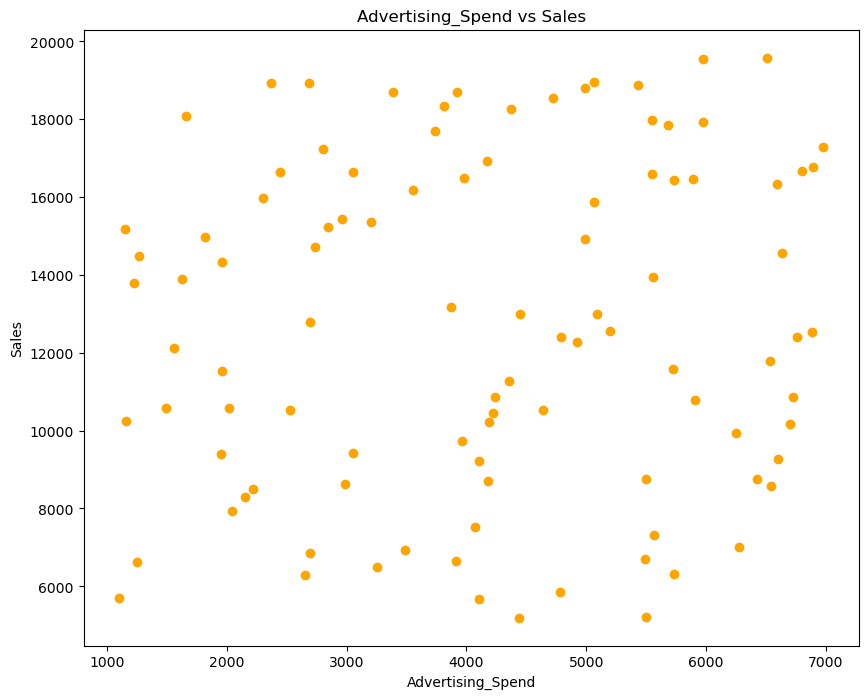

In [8]:

##Bivariate Analysis
#Scatter plot sales vs advertising spend
plt.figure(figsize=(10,8))
plt.scatter(data['Advertising_Spend'],data['Sales'],color='orange',alpha=1)
plt.xlabel('Advertising_Spend')
plt.ylabel("Sales")
plt.title('Advertising_Spend vs Sales')
plt.show()


In [9]:
print(data.columns)


Index(['Date', 'Region', 'Category', 'Sales', 'Advertising_Spend', 'Profit'], dtype='object')


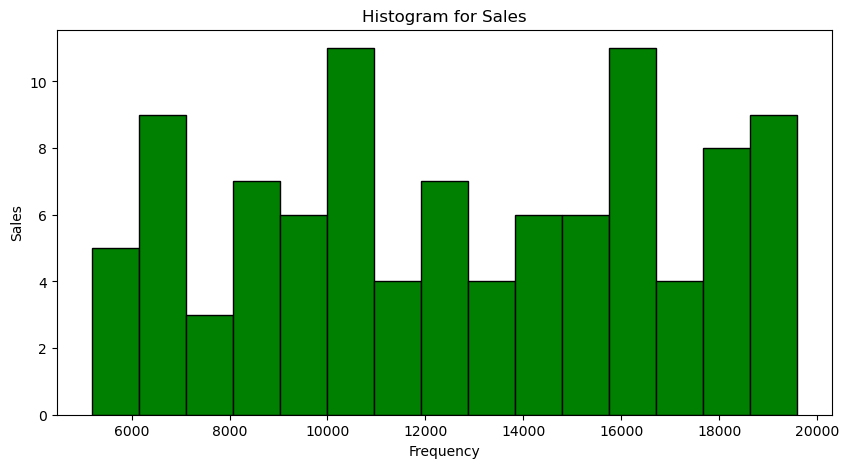

In [10]:
#Histogram for sales
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data['Sales'],bins=15,color='green',edgecolor='black')
plt.title("Histogram for Sales")
plt.xlabel("Frequency")
plt.ylabel("Sales")
plt.show()

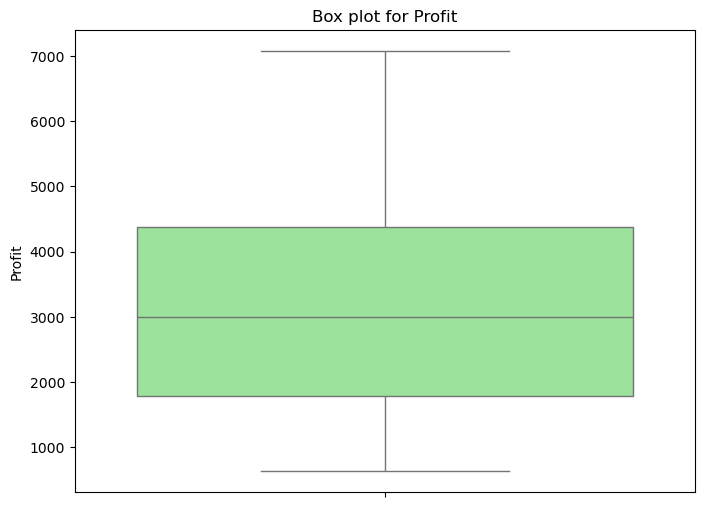

In [11]:
#Box plot for Profit
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(data['Profit'],color='lightgreen')
plt.title('Box plot for Profit')
plt.show()

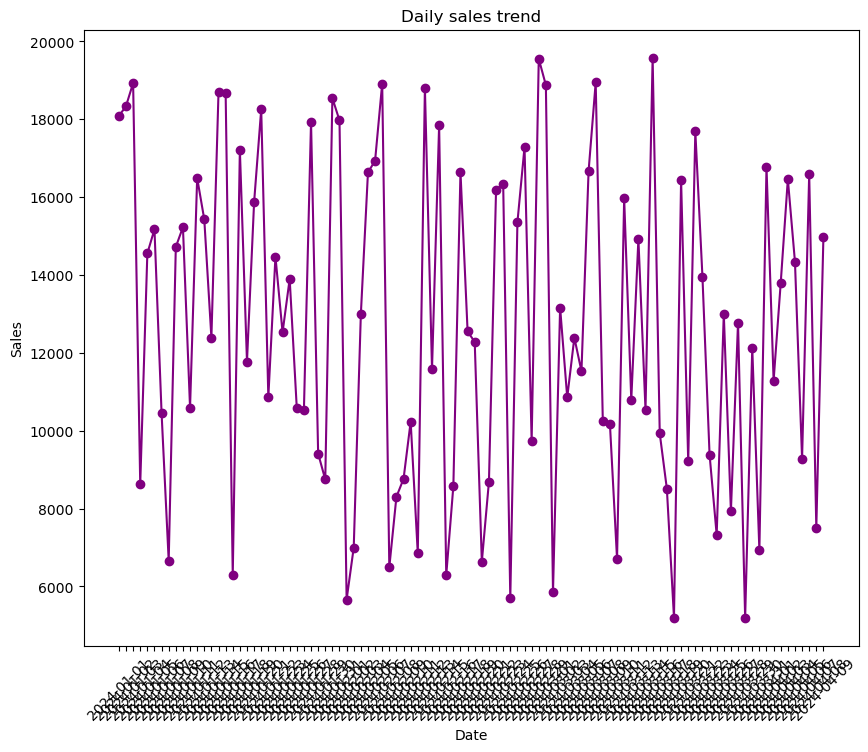

In [14]:
#Line plot for time series sales trend
plt.figure(figsize=(10,8))
plt.plot(data['Date'],data['Sales'],marker='o',linestyle='-',color='purple')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.title("Daily sales trend")
plt.show()

In [25]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month_name()
monthly_profit = data.groupby('Month')['Profit'].sum()
print(monthly_profit)

highest_profit_month = monthly_profit.idxmax()
highest_profit_value = monthly_profit.max()

print("Month with Highest Profit:", highest_profit_month)
print("Highest Profit:", highest_profit_value)



Month
April        23550.68
February     94355.98
January     116704.63
March        88196.81
Name: Profit, dtype: float64
Month with Highest Profit: January
Highest Profit: 116704.63


In [23]:
# part B DIAGNOSTIC ANALYTICS
region_sales = data.groupby('Region')['Sales'].mean()
print(region_sales)

Region
East     11732.125000
North    14351.100000
South    12358.115385
West     12694.766667
Name: Sales, dtype: float64


In [26]:
correlation = data[['Sales', 'Advertising_Spend', 'Profit']].corr()
print(correlation)


                      Sales  Advertising_Spend    Profit
Sales              1.000000           0.086171  0.687691
Advertising_Spend  0.086171           1.000000 -0.012450
Profit             0.687691          -0.012450  1.000000


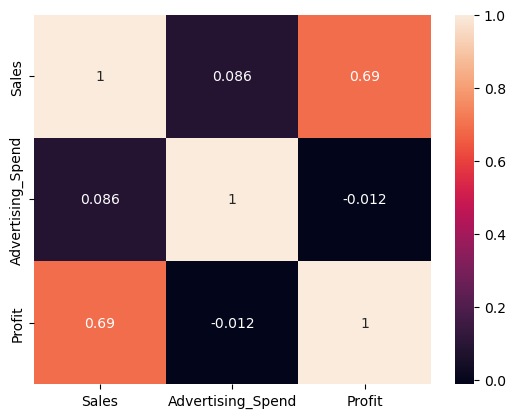

In [27]:
sns.heatmap(correlation, annot=True)
plt.show()


In [66]:
plt.figure()
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix")
plt.show()




Empty DataFrame
Columns: [Date, Region, Category, Sales, Advertising_Spend, Profit]
Index: []


In [31]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name()
april_data = data[data['Month'] == 'April']

print("April Sales:", april_data['Sales'].sum())
print("April Advertising Spend:", april_data['Advertising_Spend'].sum())
print("April Profit:", april_data['Profit'].sum())


April Sales: 121032
April Advertising Spend: 38356
April Profit: 23550.679999999997


In [32]:
correlation = data[['Sales', 'Advertising_Spend', 'Profit']].corr()
print(correlation)


                      Sales  Advertising_Spend    Profit
Sales              1.000000           0.086171  0.687691
Advertising_Spend  0.086171           1.000000 -0.012450
Profit             0.687691          -0.012450  1.000000


In [34]:
#PART C  PREDICTIVE ANALYTICS (“What Will Happen?”)
X = data[['Advertising_Spend']]   # Independent Variable
y = data['Sales']                 # Dependent Variable



In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score

predictions = model.predict(X_test)

r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

future_sales = model.predict([[6000]])

print("Predicted Sales for ₹6000 Advertising:", future_sales[0])


R² Score: -0.014228138127875045
Predicted Sales for ₹6000 Advertising: 13243.669451868958


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


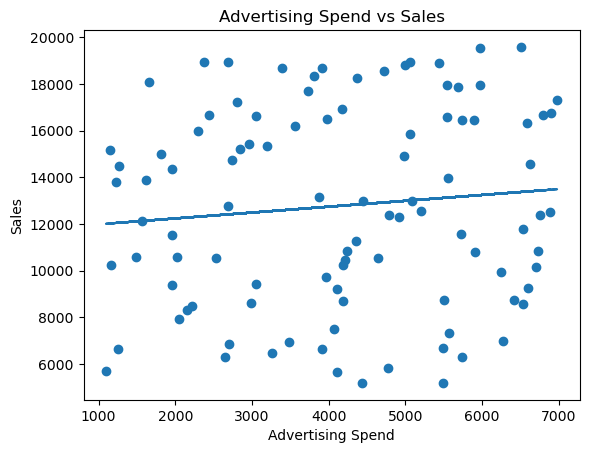

In [39]:
plt.figure()
plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.title("Advertising Spend vs Sales")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.show()


In [42]:
# PART D – PRESCRIPTIVE ANALYTICS (“What Should Be Done?”)
average_sales = data['Sales'].mean()
future_sales = model.predict([[6000]])
if future_sales[0] > average_sales:
    print("Recommendation: Increase Advertising Budget")
else:
    print("Recommendation: Optimize Cost Strategy")

region_profit = data.groupby('Region')['Profit'].mean()
print(region_profit)


Recommendation: Increase Advertising Budget
Region
East     2944.582500
North    3772.894500
South    3100.220769
West     3202.483000
Name: Profit, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
low_region = region_profit.idxmin()
print("Region needing improvement:", low_region)


Region needing improvement: East


In [44]:
print("Recommendation: Increase focus and marketing in", low_region)


Recommendation: Increase focus and marketing in East


In [45]:
category_profit = data.groupby('Category')['Profit'].mean()
print(category_profit)

best_category = category_profit.idxmax()
print("Focus on Category:", best_category)


Category
Clothing       3216.486923
Electronics    3168.139143
Furniture      3289.604359
Name: Profit, dtype: float64
Focus on Category: Furniture


In [46]:
correlation = data[['Sales','Advertising_Spend']].corr()
print(correlation)


                      Sales  Advertising_Spend
Sales              1.000000           0.086171
Advertising_Spend  0.086171           1.000000


In [47]:
print("Strong relationship detected: Gradually increase advertising budget.")


Strong relationship detected: Gradually increase advertising budget.


In [48]:
print("Weak relationship: Improve product strategy instead of increasing ads.")


Weak relationship: Improve product strategy instead of increasing ads.


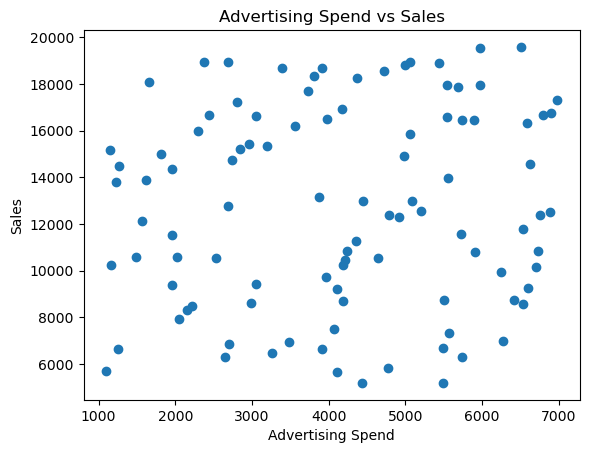

In [52]:
plt.figure()
plt.scatter(data['Advertising_Spend'], data['Sales'])
plt.title("Advertising Spend vs Sales")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.show()

